In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1)

## Loading the Datasets

In [2]:
taxi=pd.read_csv(r'Train Datasets\taxi-rides.csv')
weather=pd.read_csv(r'Train Datasets\weather.csv')

## start with Data cleaning

In [9]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
0,0.62,Uber,1.544770e+12,West End,Haymarket Square,1.0,c1b4a572-24b2-484d-aac5-b4f97b790480,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0


In [5]:
taxi.describe()

,distance,time_stamp,surge_multiplier,price
count,554456.000000,5.544560e+05,554456.000000,510321.000000
mean,2.189834,1.544046e+12,1.013946,16.545307
std,1.139779,6.892123e+08,0.091999,9.322049
min,0.020000,1.543200e+12,1.000000,2.500000
25%,1.270000,1.543440e+12,1.000000,9.000000
50%,2.160000,1.543740e+12,1.000000,13.500000
75%,2.930000,1.544830e+12,1.000000,22.500000
max,7.860000,1.545160e+12,3.000000,97.500000


In [6]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554456 entries, 0 to 554455
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          554456 non-null  float64
 1   cab_type          554456 non-null  object 
 2   time_stamp        554456 non-null  float64
 3   destination       554456 non-null  object 
 4   source            554456 non-null  object 
 5   surge_multiplier  554456 non-null  float64
 6   id                554456 non-null  object 
 7   product_id        554456 non-null  object 
 8   name              554456 non-null  object 
 9   price             510321 non-null  float64
dtypes: float64(4), object(6)
memory usage: 42.3+ MB


In [7]:
taxi.shape

(554456, 10)

# investigate and find missing data

In [10]:
taxi.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
surge_multiplier        0
id                      0
product_id              0
name                    0
price               44135
dtype: int64

In [14]:
print(' percentage of missing price values  = {}'.format((taxi['price'].isnull().sum()/len(taxi))*100))

 percentage of missing price values  = 7.96005453994546


## since `price` is our target so we will drop the rows containing missing values

In [15]:
taxi.dropna(inplace=True)
taxi.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
surge_multiplier    0
id                  0
product_id          0
name                0
price               0
dtype: int64

## investigate and find Duplicated data

In [16]:
taxi.duplicated().sum()

0

## Detecting outliers

In [17]:
taxi.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source',
       'surge_multiplier', 'id', 'product_id', 'name', 'price'],
      dtype='object')

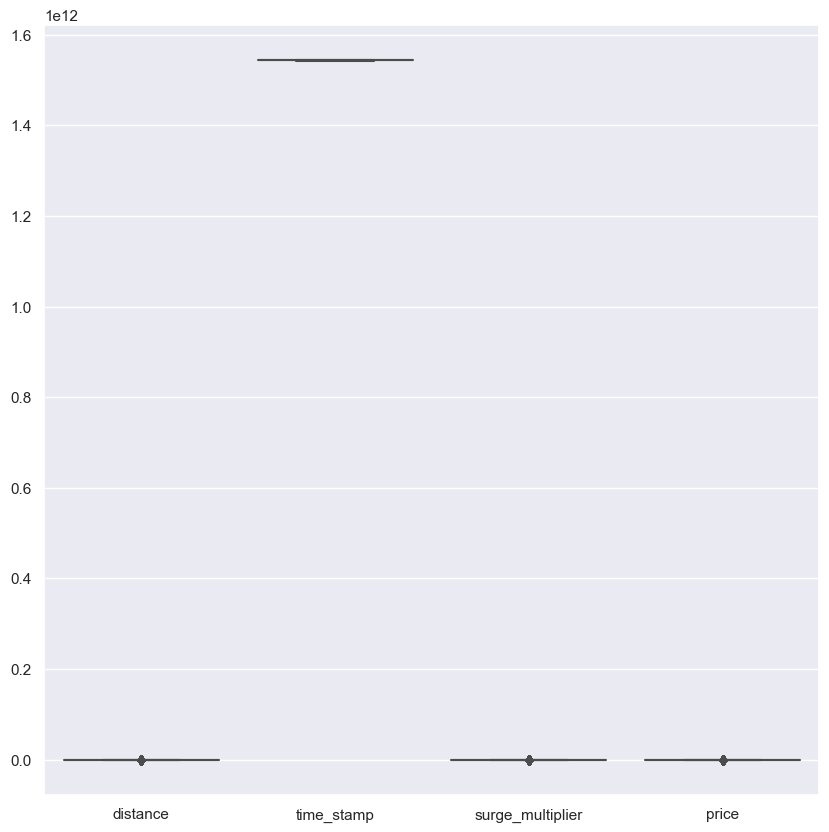

In [18]:
sns.boxplot(data=taxi)
plt.show()

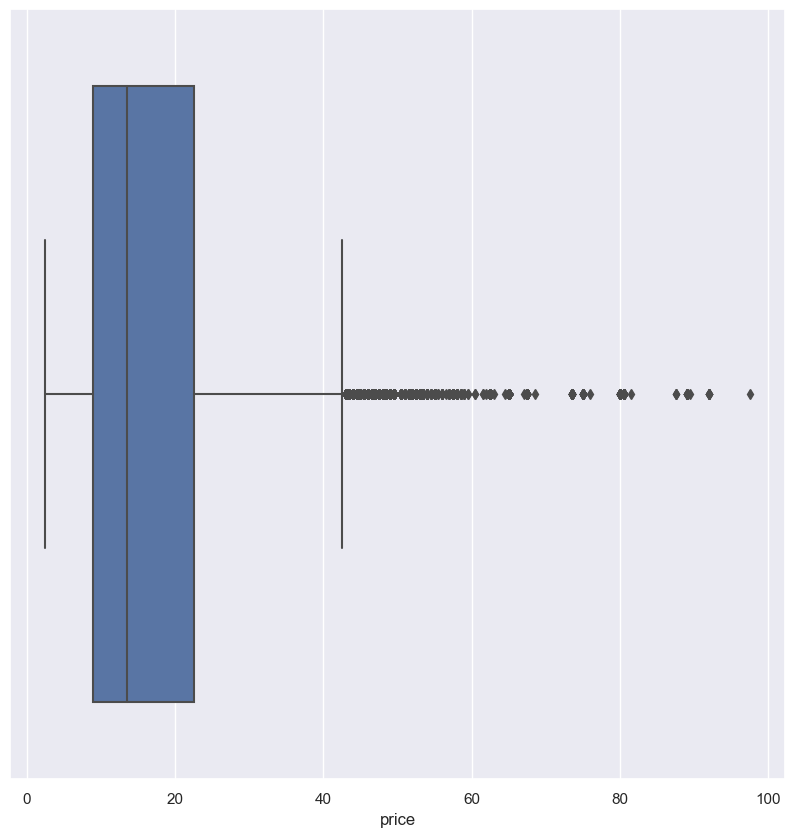

In [19]:
sns.boxplot(x=taxi['price'])
plt.show()

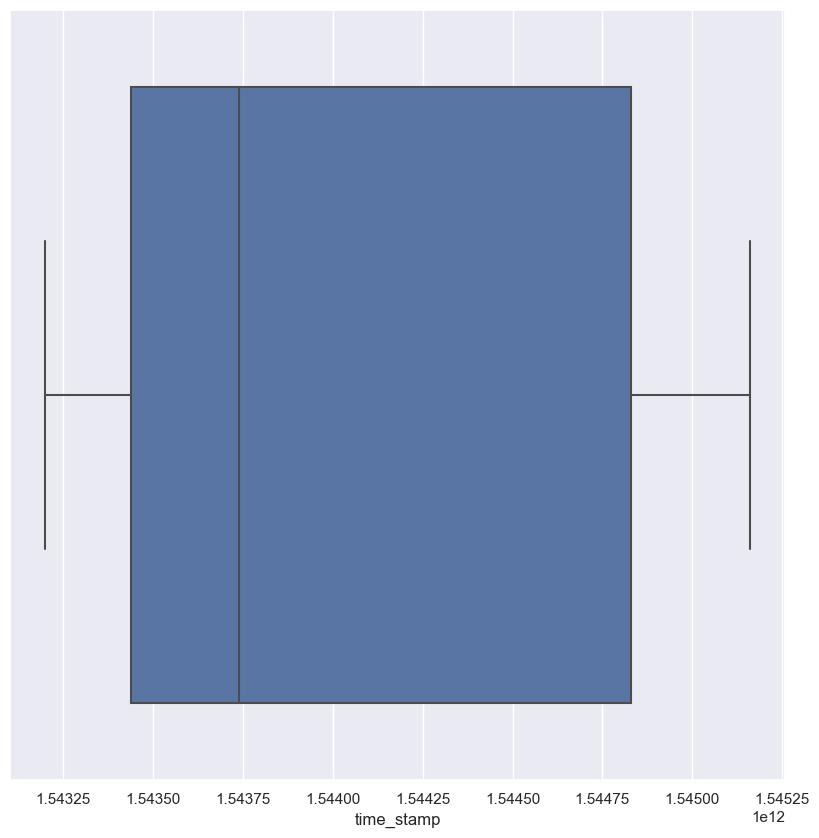

In [20]:
sns.boxplot(x=taxi['time_stamp'])
plt.show()

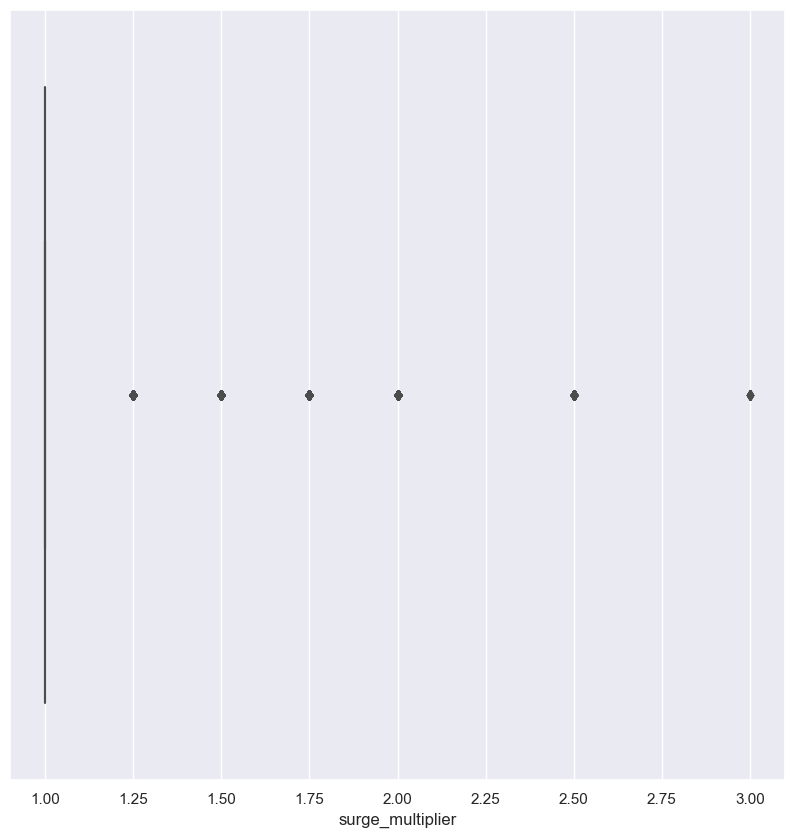

In [21]:
sns.boxplot(x=taxi['surge_multiplier'])
plt.show()

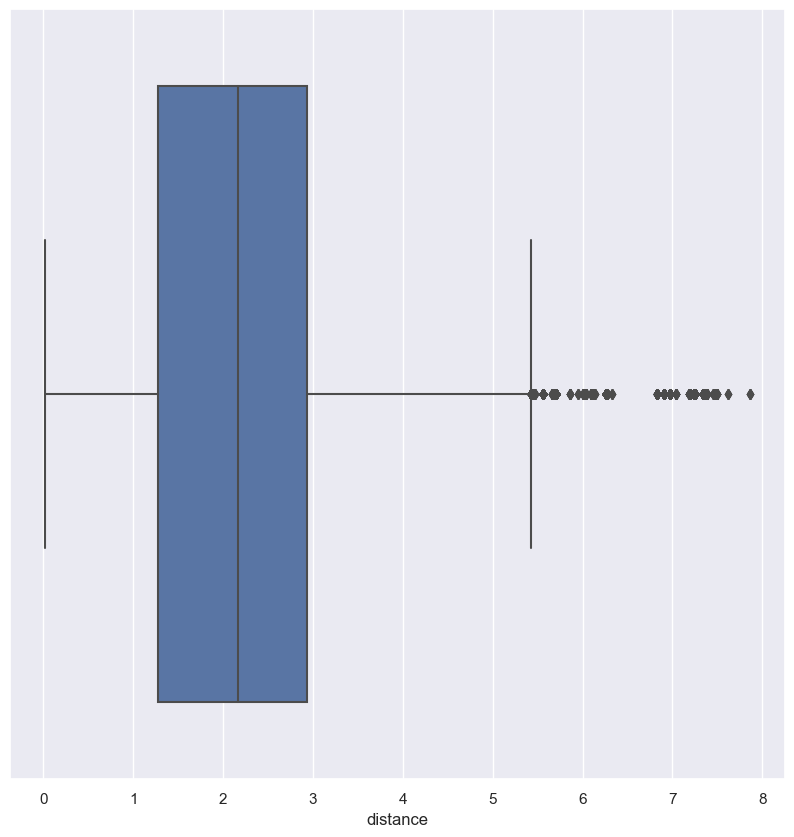

In [22]:
sns.boxplot(x=taxi['distance'])
plt.show()

## remove_outliers using `IQR` method

In [23]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        upper_limit=Q3+1.5*IQR
        lower_limit=Q1-1.5*IQR
        # outlires are below lower limit and above upper limit
        outliers = ( ( df[col] < lower_limit) | (df[col] > upper_limit) )
        indecies=df[outliers].index
        print('number of outliers in {} is : {}'.format(col,len(indecies)))
        df.drop(indecies,inplace=True)

In [24]:
columns={'distance','surge_multiplier','price'}
remove_outliers(taxi,columns)

number of outliers in surge_multiplier is : 16851
number of outliers in price is : 2248
number of outliers in distance is : 5586


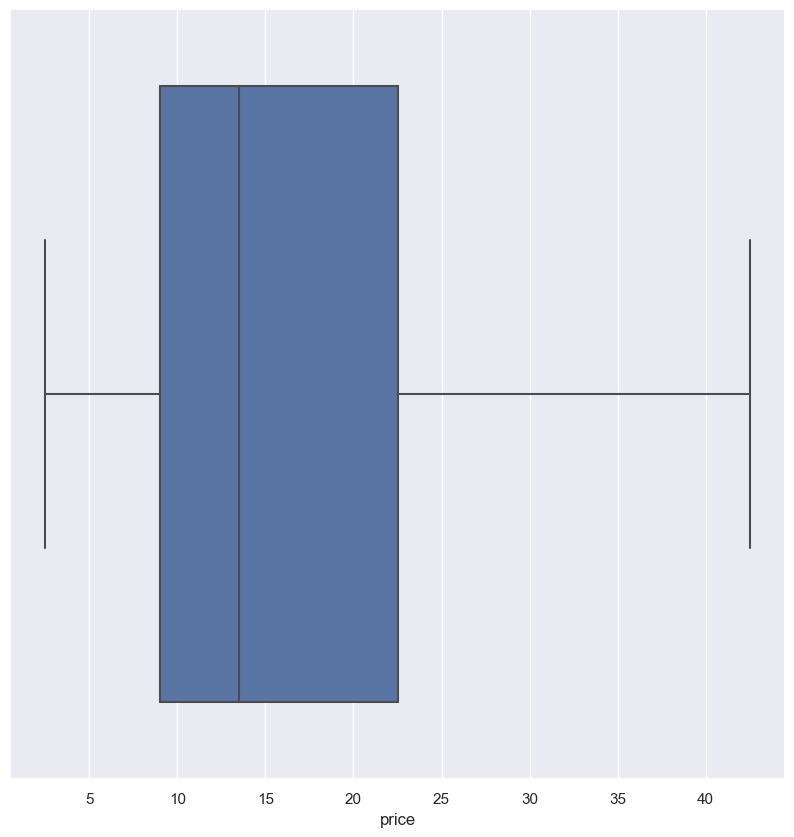

In [25]:
sns.boxplot(x=taxi['price'])
plt.show()

In [26]:
taxi.head()

,distance,cab_type,time_stamp,destination,source,surge_multiplier,id,product_id,name,price
1,2.27,Uber,1.543400e+12,Boston University,Beacon Hill,1.0,f9e7e7e6-b309-479b-9f90-bf26a1870c81,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0
2,2.00,Lyft,1.544920e+12,Back Bay,Haymarket Square,1.0,154e8438-46f5-4e5f-9872-15cc95e85eed,lyft,Lyft,10.5
3,3.98,Lyft,1.543620e+12,Financial District,Northeastern University,1.0,6bdc30a6-9a80-487b-914e-8d9b82ee4acb,lyft_plus,Lyft XL,22.5
4,1.49,Lyft,1.543580e+12,Back Bay,Northeastern University,1.0,0cb12fe9-cd72-4feb-b341-4a566b2e6643,lyft,Lyft,7.0
5,1.97,Uber,1.543460e+12,Northeastern University,Beacon Hill,1.0,8ca92e07-e4b9-4191-a212-9098c5fed50a,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5


In [27]:
taxi.shape

(485636, 10)

## applying one hot-encoding

In [28]:
taxi=pd.get_dummies(data=taxi,columns=['cab_type'],drop_first=True)
# rename the column
taxi.rename(columns={'cab_type_Uber':'cab_type'},inplace=True)

In [29]:
taxi['id'].value_counts()

f9e7e7e6-b309-479b-9f90-bf26a1870c81    1
8fa508f8-909d-4d6a-a8d4-4438a7be9817    1
4a697520-5019-4210-94c6-110cc8e8ec81    1
dd171fe9-36f3-4f48-821d-465cb4999fd8    1
d3c3a864-1c2a-4afc-9d30-e80abd3ea14f    1
                                       ..
cf2053c0-31b2-403b-8cc5-8bf0892f46ce    1
7d3f278c-08ca-41c0-9ac5-758a37a234af    1
68bfa4e9-bac0-4ed7-a5b6-e88d0939498b    1
30148495-8775-4e7d-a0e0-def3ab72b6c8    1
cd258703-5a56-4d87-b9c3-5166210698ea    1
Name: id, Length: 485636, dtype: int64

## drop `id` feature due it doesn't provide any important information

In [30]:
taxi.drop(['id'],axis=1,inplace=True)
taxi.head()

,distance,time_stamp,destination,source,surge_multiplier,product_id,name,price,cab_type
1,2.27,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,1
2,2.00,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,10.5,0
3,3.98,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,22.5,0
4,1.49,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,7.0,0
5,1.97,1.543460e+12,Northeastern University,Beacon Hill,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,1


In [31]:
taxi['destination'].value_counts()

Back Bay                   41177
West End                   41151
Haymarket Square           40984
Financial District         40983
Beacon Hill                40976
North End                  40949
North Station              40893
Theatre District           40858
Fenway                     40761
South Station              40280
Northeastern University    39994
Boston University          36630
Name: destination, dtype: int64

In [32]:
taxi['source'].value_counts()

North End                  42349
Haymarket Square           42041
North Station              41587
West End                   41464
South Station              41238
Beacon Hill                40474
Theatre District           40380
Boston University          40249
Fenway                     40104
Northeastern University    40057
Back Bay                   39039
Financial District         36654
Name: source, dtype: int64

In [33]:
taxi['name'].value_counts()

UberX           43373
UberPool        43266
WAV             43176
Black           43141
UberXL          43121
Black SUV       42736
Shared          40570
Lyft XL         37511
Lux Black       37453
Lyft            37391
Lux             37368
Lux Black XL    36530
Name: name, dtype: int64

In [34]:
taxi['product_id'].value_counts()

55c66225-fbe7-4fd5-9072-eab1ece5e23e    43373
997acbb5-e102-41e1-b155-9df7de0a73f2    43266
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    43176
6c84fd89-3f11-4782-9b50-97c468b19529    43141
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    43121
6d318bcc-22a3-4af6-bddd-b409bfce1546    42736
lyft_line                               40570
lyft_plus                               37511
lyft_lux                                37453
lyft                                    37391
lyft_premier                            37368
lyft_luxsuv                             36530
Name: product_id, dtype: int64

taxi=pd.get_dummies(data=taxi,columns=['destination','source','name','product_id'])

In [35]:
taxi.head()

,distance,time_stamp,destination,source,surge_multiplier,product_id,name,price,cab_type
1,2.27,1.543400e+12,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,1
2,2.00,1.544920e+12,Back Bay,Haymarket Square,1.0,lyft,Lyft,10.5,0
3,3.98,1.543620e+12,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,22.5,0
4,1.49,1.543580e+12,Back Bay,Northeastern University,1.0,lyft,Lyft,7.0,0
5,1.97,1.543460e+12,Northeastern University,Beacon Hill,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,1


## we will continue working on the left nominal features only after mergeing the 2 data sets
***

## now let's move to work on weather data

In [36]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [37]:
weather.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [38]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [39]:
weather.shape

(6276, 8)

In [40]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [41]:
print(' percentage of missing rain values  = {}'.format((weather['rain'].isnull().sum()/len(weather))*100))

 percentage of missing rain values  = 85.75525812619503


## percentage of missing rain values is about 85% so we will drop rain column 

In [42]:
weather.drop(['rain'],axis=1,inplace=True)

In [43]:
weather.isnull().sum()

temp          0
location      0
clouds        0
pressure      0
time_stamp    0
humidity      0
wind          0
dtype: int64

## Find duplicate data

In [44]:
weather.duplicated().sum()

0

## Detecting outliers

In [45]:
weather.columns

Index(['temp', 'location', 'clouds', 'pressure', 'time_stamp', 'humidity',
       'wind'],
      dtype='object')

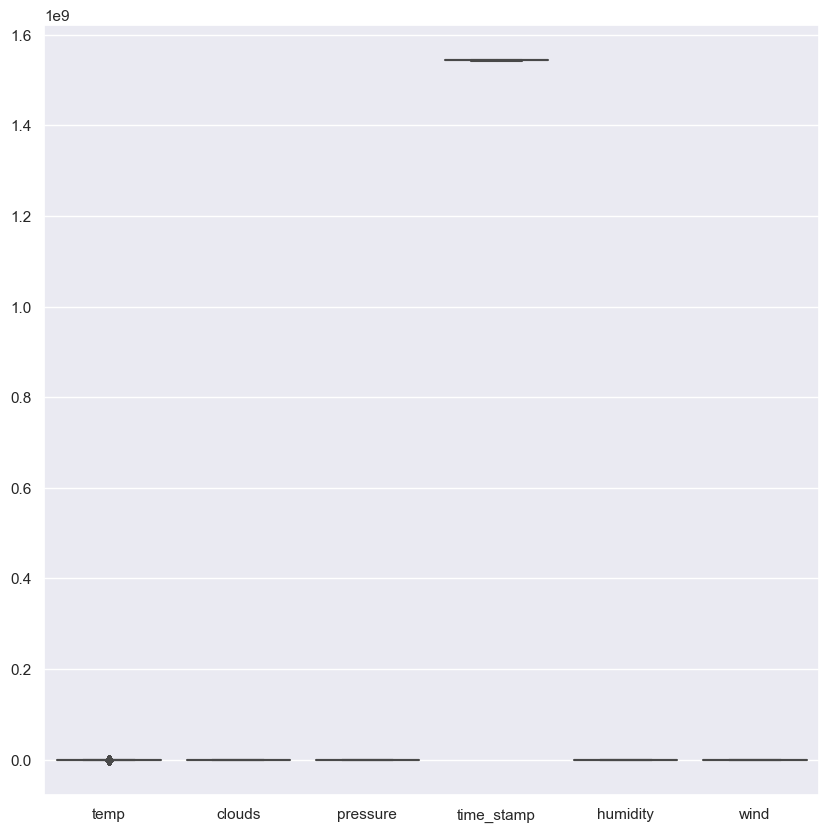

In [46]:
sns.boxplot(data=weather)
plt.show()

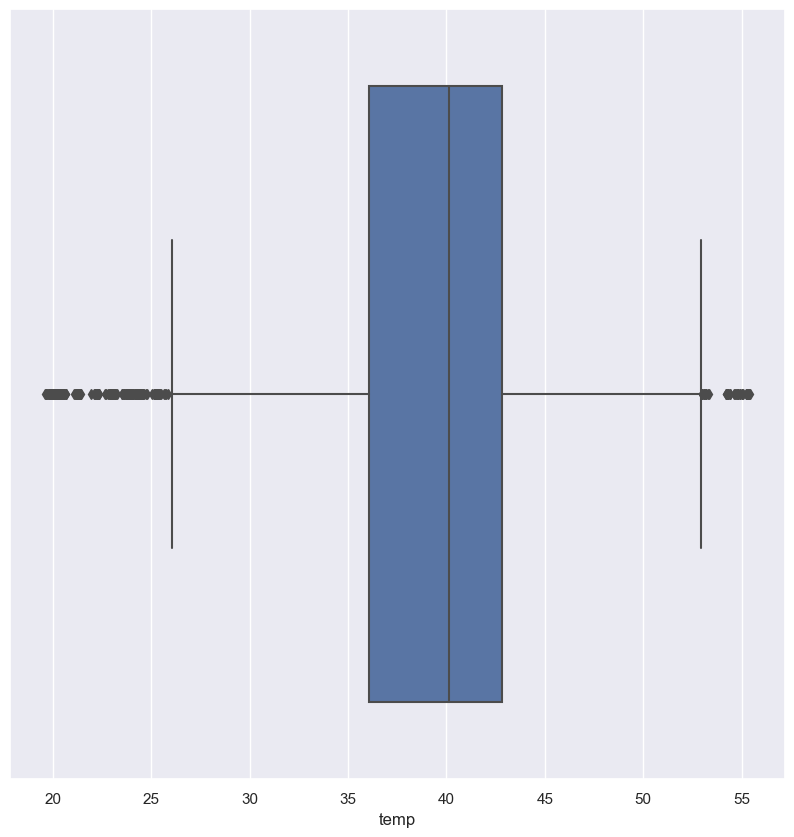

In [47]:
sns.boxplot(x=weather['temp'])
plt.show()

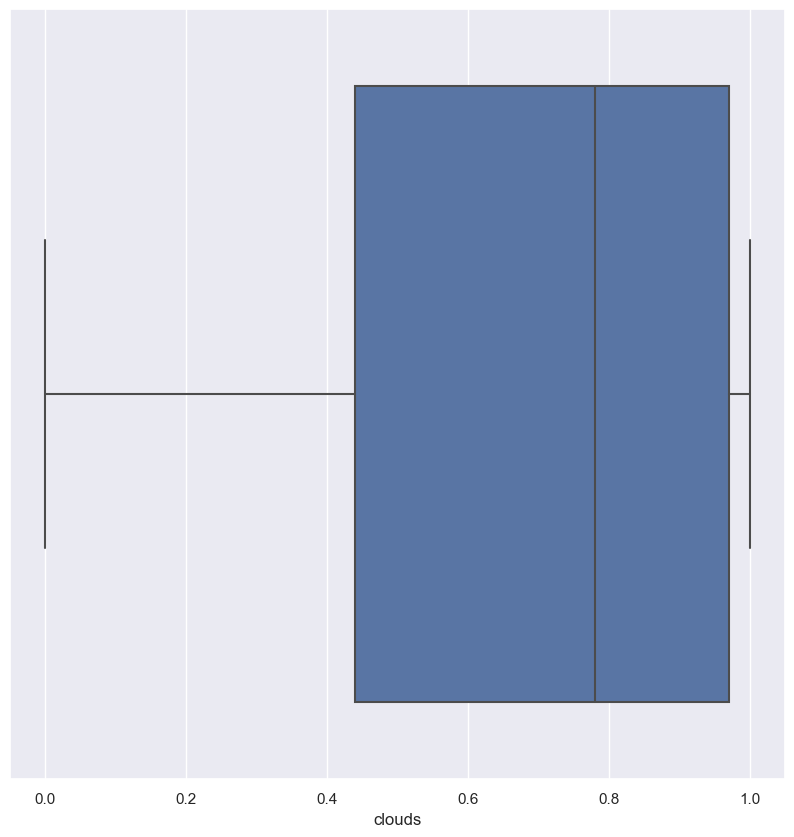

In [48]:
sns.boxplot(x=weather['clouds'])
plt.show()

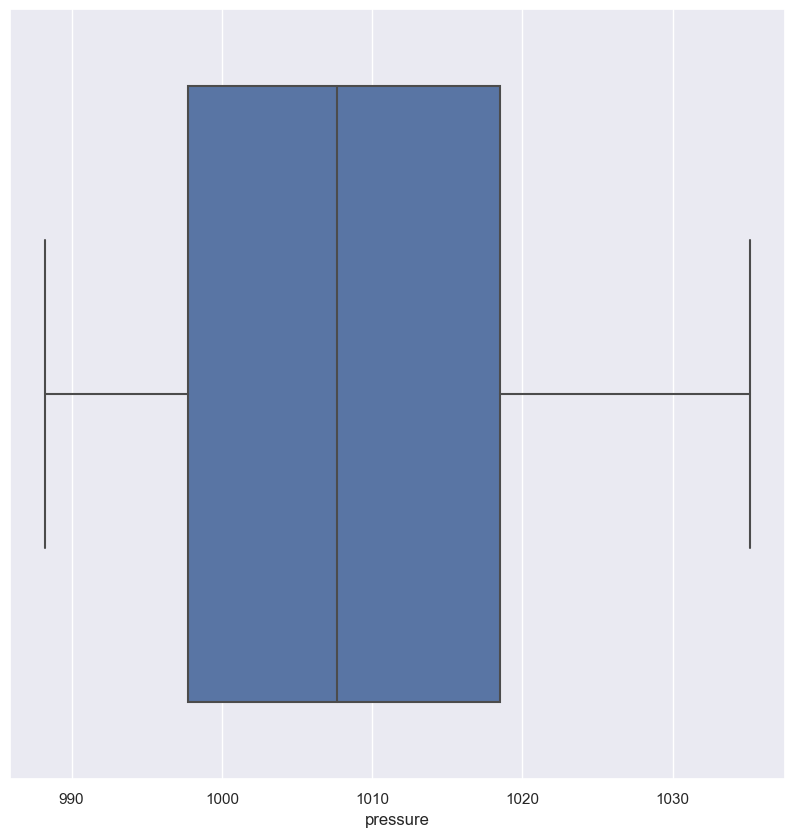

In [49]:
sns.boxplot(x=weather['pressure'])
plt.show()

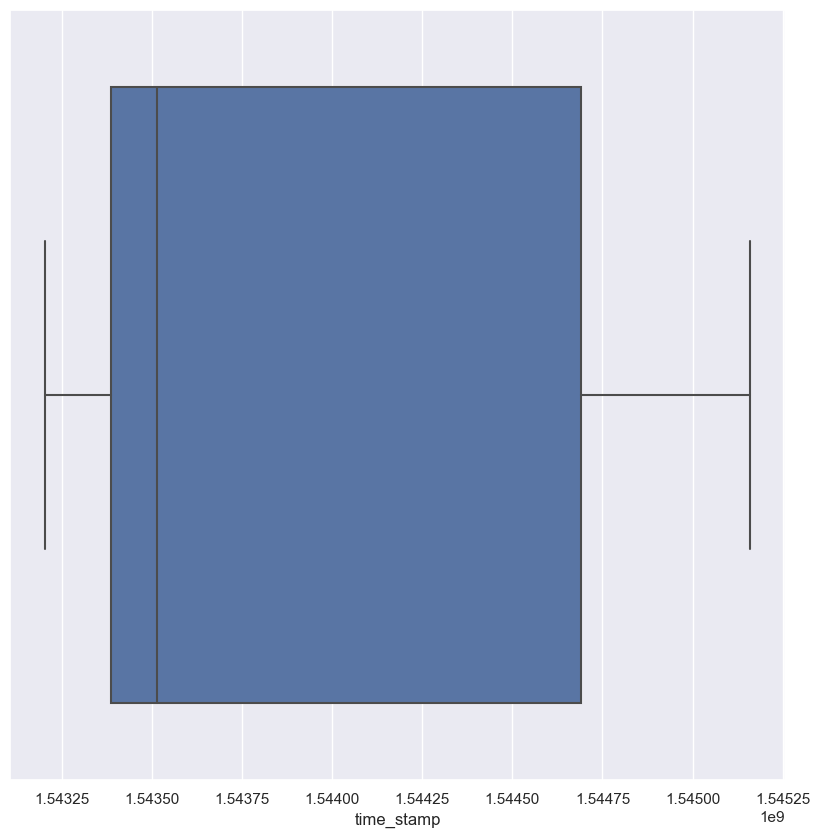

In [50]:
sns.boxplot(x=weather['time_stamp'])
plt.show()

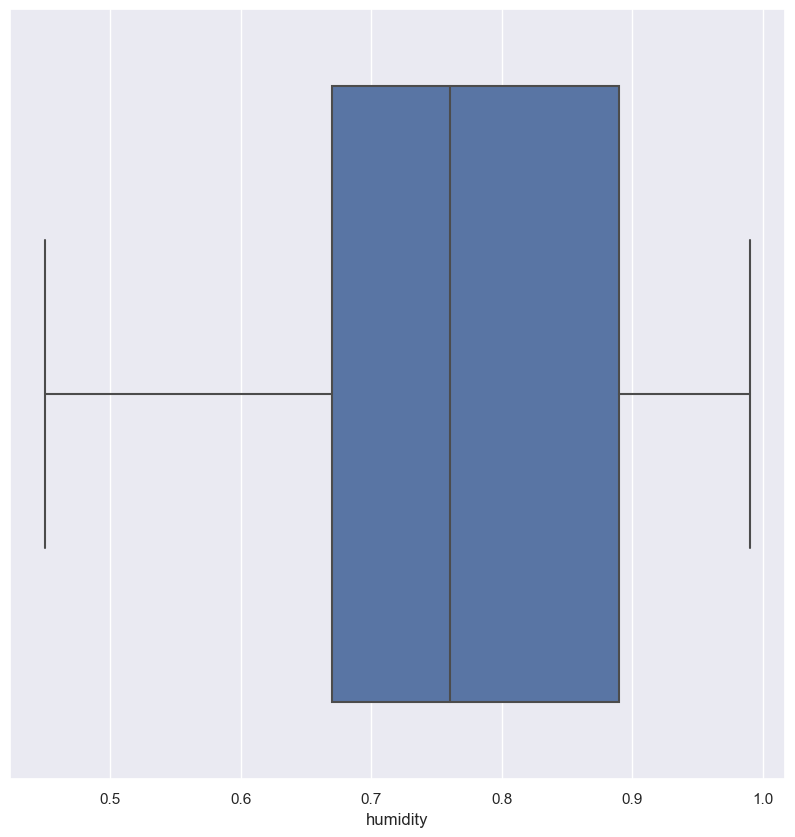

In [51]:
sns.boxplot(x=weather['humidity'])
plt.show()

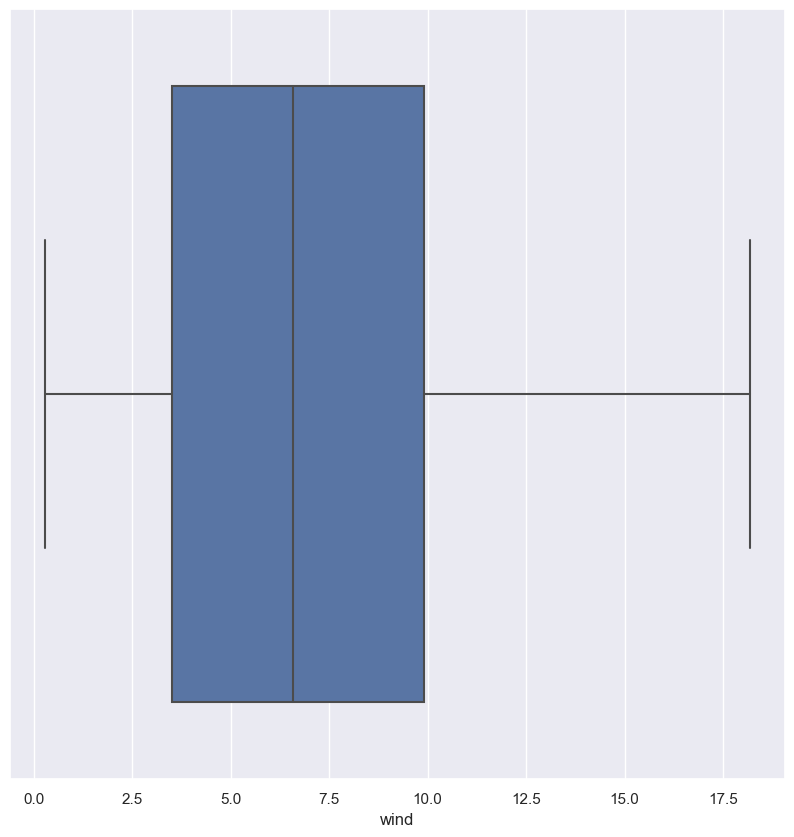

In [52]:
sns.boxplot(x=weather['wind'])
plt.show()

## there are clear outliers on temp column so let's remove it

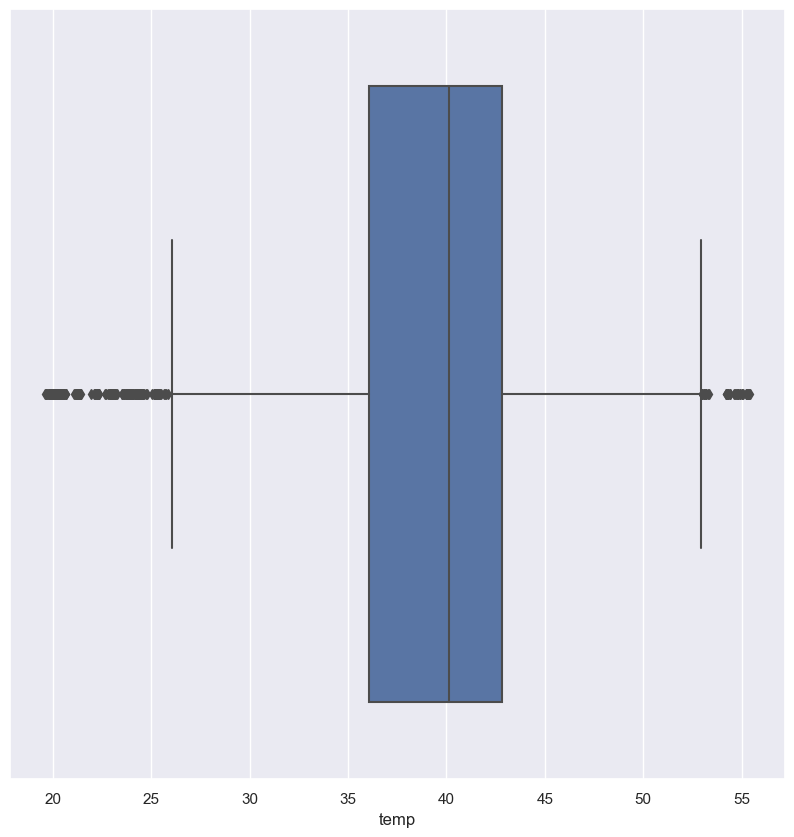

In [53]:
sns.boxplot(x=weather['temp'])
plt.show()

### After removing these outliers using `IQR` method ,the boxplot still contains other outliers
### That's mean that we have a `non-normal` distribution data, so we will use `median absolute deviation` method that can treat with such problem

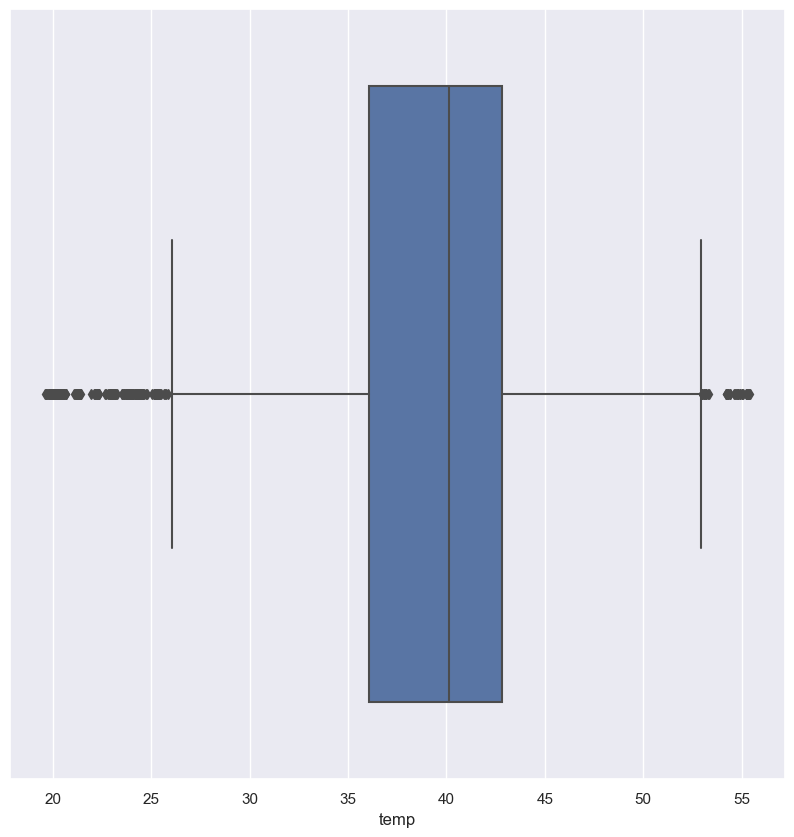

number of outliers in temp is : 1020


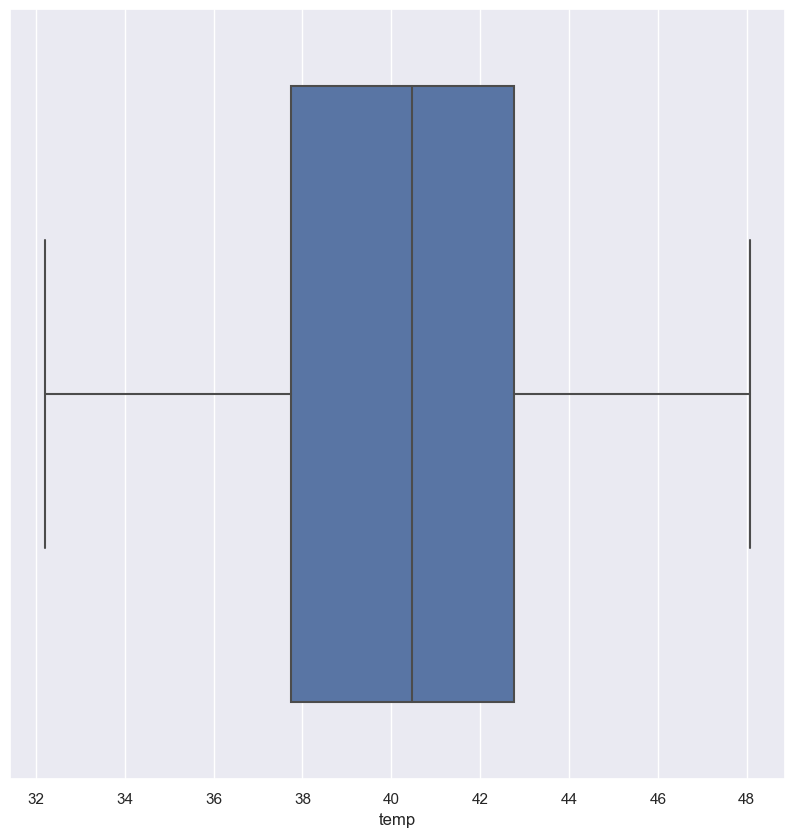

In [56]:
def MAD(df,col,thresh_hold):
    sns.boxplot(x=df[col])
    plt.show()
    from scipy import stats
    med = float(np.median(df[col], axis = 0))
    mad = (stats.median_abs_deviation(df[col]))
    outlier = []
    for i, v in enumerate(df[col]):
        t = (v-med)/mad
        if t > thresh_hold or t<-thresh_hold:
            outlier.append(i)
        else:
            continue
    print('number of outliers in {} is : {}'.format( col,len(outlier)))

    d=df.drop(outlier)
    sns.boxplot(x=d[col])
    plt.show()
    return d

weath=MAD(weather,'temp',thresh_hold=2.3)

In [57]:
weath.head()

,temp,location,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003901,0.75,11.49


In [58]:
weath.shape

(5256, 7)

In [59]:
taxi['destination'].unique().sort()==weath['location'].unique().sort()

True

In [60]:
weath['location'].value_counts()

Financial District         442
South Station              442
Beacon Hill                438
Boston University          438
West End                   438
Fenway                     437
Haymarket Square           437
North End                  437
North Station              437
Northeastern University    437
Theatre District           437
Back Bay                   436
Name: location, dtype: int64

weath=pd.get_dummies(data=weath,columns=['location'])

## Merging our data

In [61]:
print('weather shape:{}'.format(weath.shape))
print('Taxi shape:{}'.format(taxi.shape))

weather shape:(5256, 7)
Taxi shape:(485636, 9)


In [62]:
data=taxi.copy()
data2=weath.copy()

In [63]:
from datetime import datetime
data['time_stamp'] = data['time_stamp'].astype(str)
data2['time_stamp'] = data2['time_stamp'].astype(str)
data['time_stamp'] = data['time_stamp'].str[:7]
data2['time_stamp'] = data2['time_stamp'].str[:7]
data.head(5)

,distance,time_stamp,destination,source,surge_multiplier,product_id,name,price,cab_type
1,2.27,1543400,Boston University,Beacon Hill,1.0,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,8.0,1
2,2.00,1544920,Back Bay,Haymarket Square,1.0,lyft,Lyft,10.5,0
3,3.98,1543620,Financial District,Northeastern University,1.0,lyft_plus,Lyft XL,22.5,0
4,1.49,1543580,Back Bay,Northeastern University,1.0,lyft,Lyft,7.0,0
5,1.97,1543460,Northeastern University,Beacon Hill,1.0,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,1


In [64]:
data2.rename(columns={'location':'destination'},inplace=True)
data2.head(5)

,temp,destination,clouds,pressure,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,1545003,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,1545003,0.76,11.32
2,42.50,Boston University,1.0,1012.15,1545003,0.76,11.07
3,42.11,Fenway,1.0,1012.13,1545003,0.77,11.09
4,43.13,Financial District,1.0,1012.14,1545003,0.75,11.49


In [65]:
mergedf = data2.merge(data, how='inner')
mergedf.shape

(175719, 14)

In [66]:
mergedf.drop_duplicates(inplace=True)

In [67]:
mergedf.duplicated().sum() == 0
mergedf.shape

(141295, 14)

In [68]:
data=mergedf.copy()

In [69]:
data.head()

,temp,destination,clouds,pressure,time_stamp,humidity,wind,distance,source,surge_multiplier,product_id,name,price,cab_type
0,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,2.39,Beacon Hill,1.0,lyft_plus,Lyft XL,16.5,0
1,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.55,Theatre District,1.0,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.5,1
2,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,0.44,Financial District,1.0,lyft_lux,Lux Black,16.5,0
3,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,2.17,North Station,1.0,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.0,1
4,45.52,South Station,0.89,1000.08,1543830,0.95,1.39,2.14,West End,1.0,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.5,1


## Applying some Exploratory Data Analysis and Visualization

## Distances


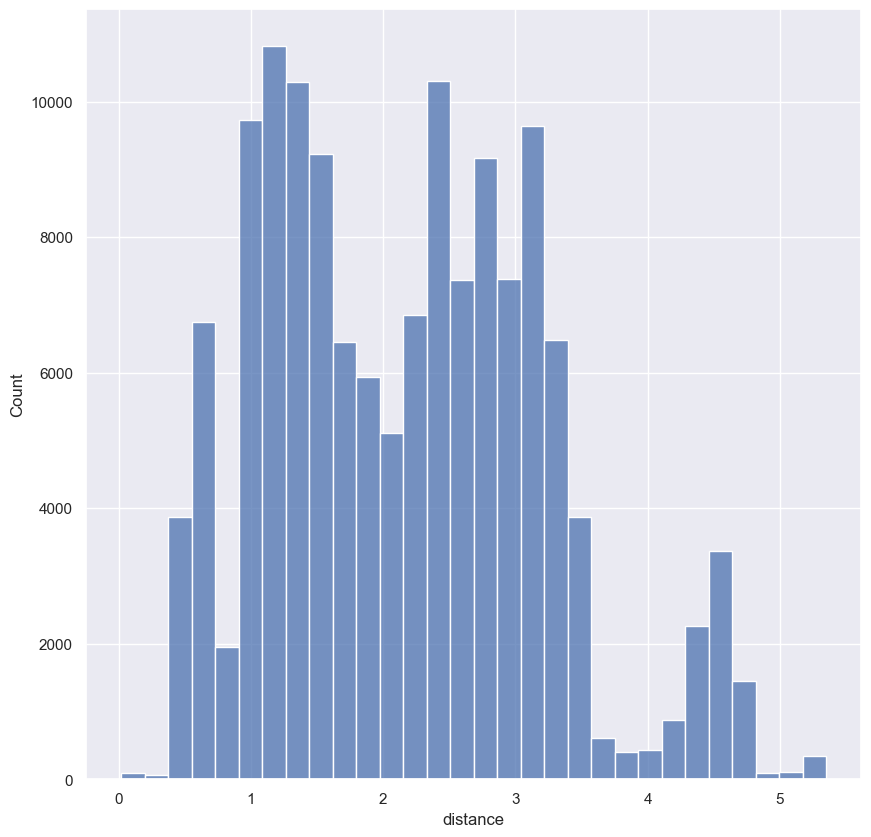

In [70]:
sns.histplot(data=data['distance'],kde=False,bins=30)
plt.show()

## number of cab_type with respect to sources and destinations of the travels

<AxesSubplot:xlabel='cab_type,source'>

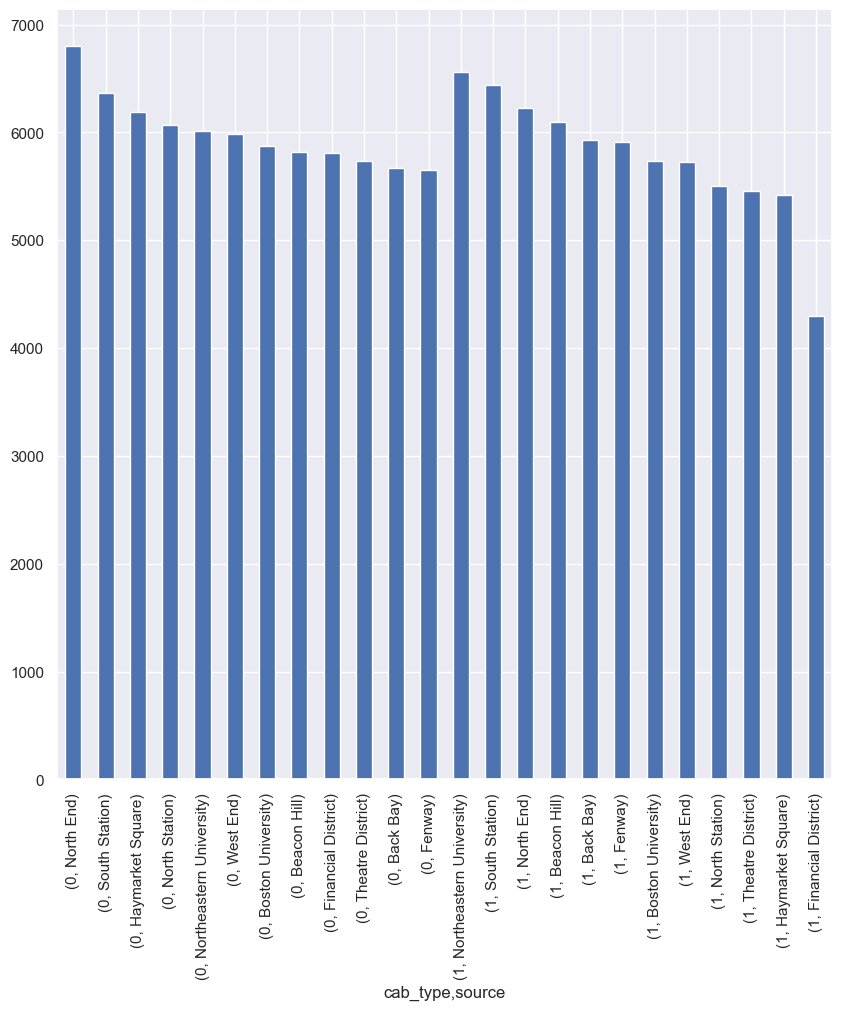

In [71]:
data.groupby(['cab_type'])['source'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='cab_type,destination'>

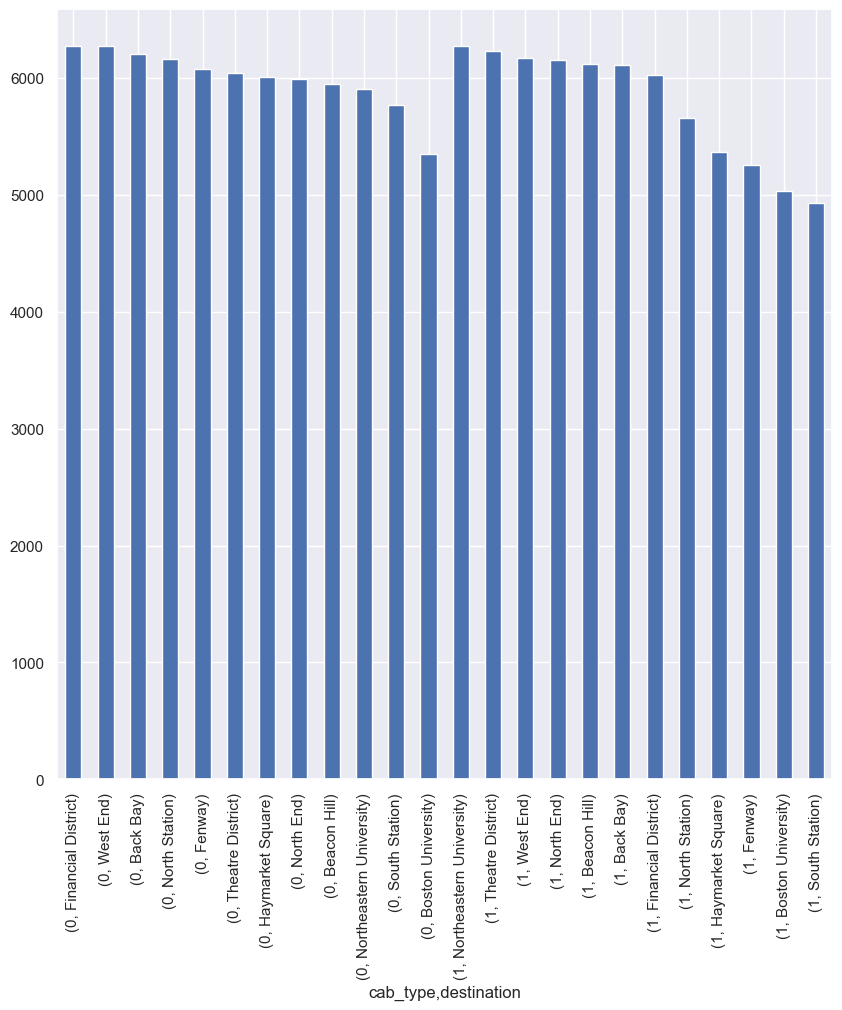

In [72]:
data.groupby(['cab_type'])['destination'].value_counts().plot(kind='bar')

## overall outcome for each cab_type

In [73]:
data.groupby('cab_type')['price'].sum()

cab_type
0    1189588.08
1    1110453.00
Name: price, dtype: float64

### overall surge_multiplier for each cab_type


In [74]:
data.groupby('cab_type')['surge_multiplier'].sum()

cab_type
0    71986.0
1    69309.0
Name: surge_multiplier, dtype: float64

## know overall distances to specific destinations 


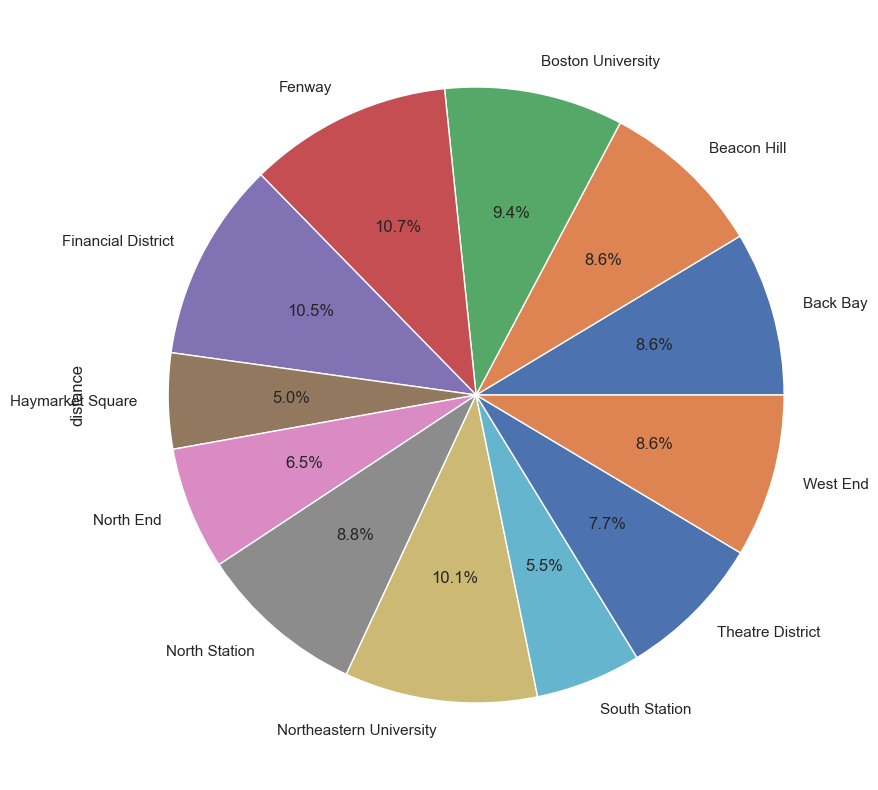

In [76]:
data.groupby('destination')['distance'].sum().plot.pie(autopct="%.1f%%");
plt.show()

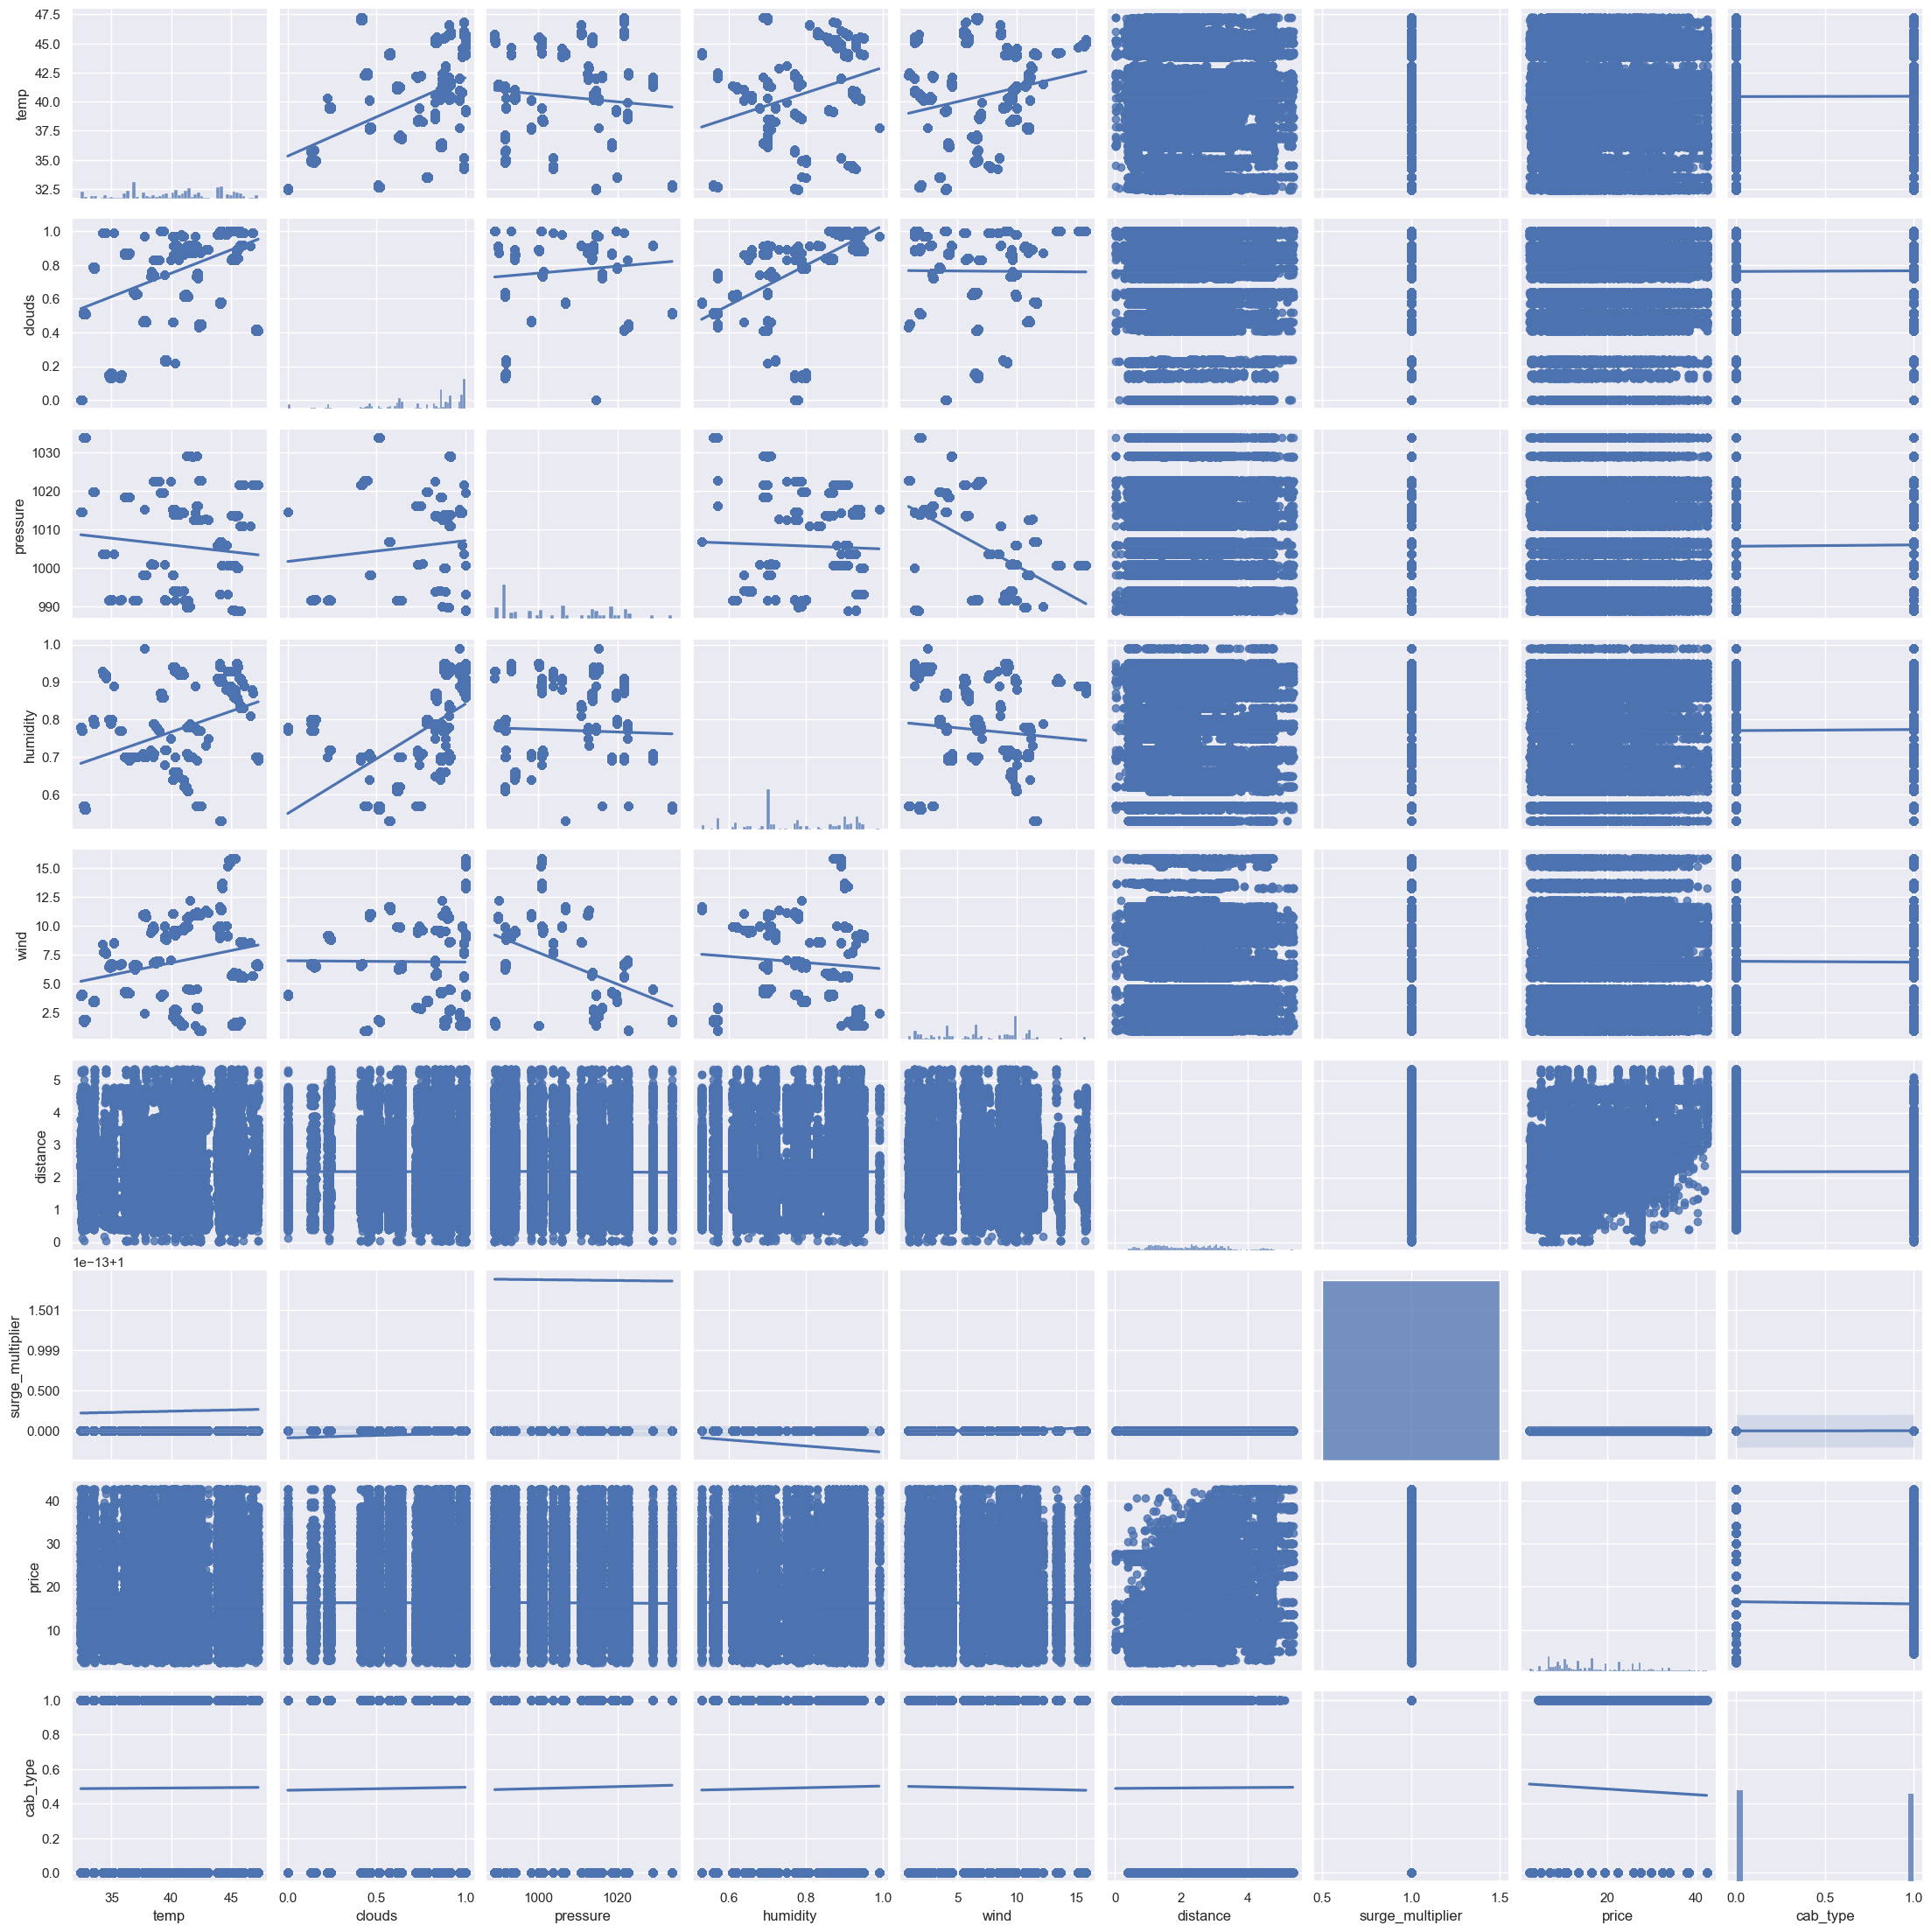

In [77]:
sns.pairplot(data=data,kind='reg')

### This plot can help us in feature selection , as we can conclude and choose  good features upon the tendency and `correlaton` between each `feature` and the `target` and the other `features` and that's clear in the plot

<AxesSubplot:xlabel='distance', ylabel='price'>

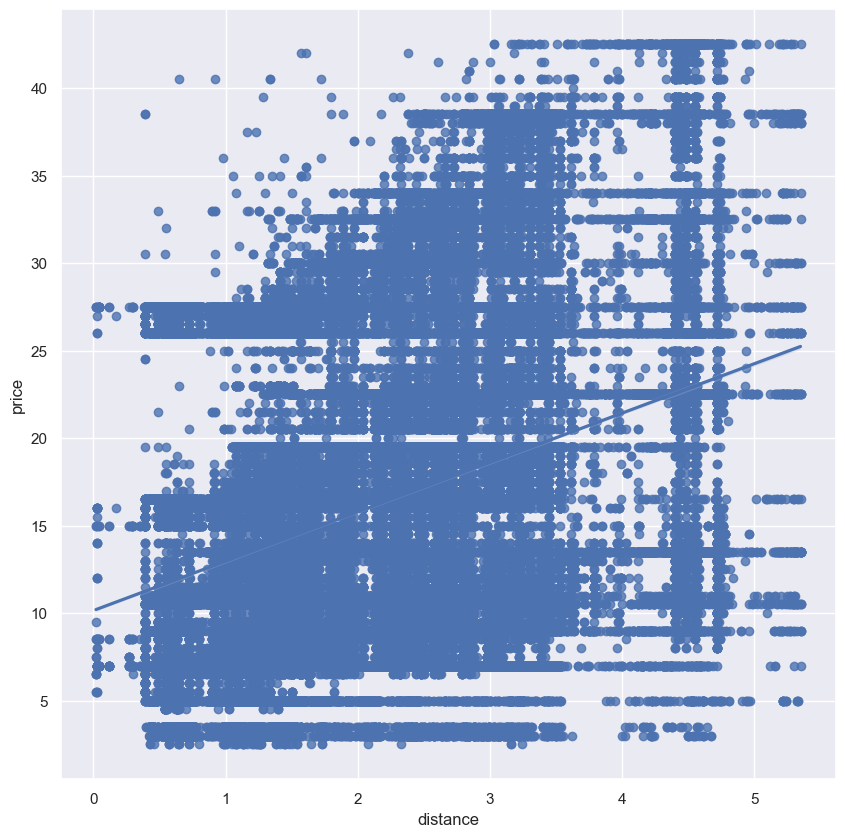

In [78]:
sns.regplot(x='distance',y='price',data=data)

## there is a clear correlation 


## let's apply feature selection 

<AxesSubplot:>

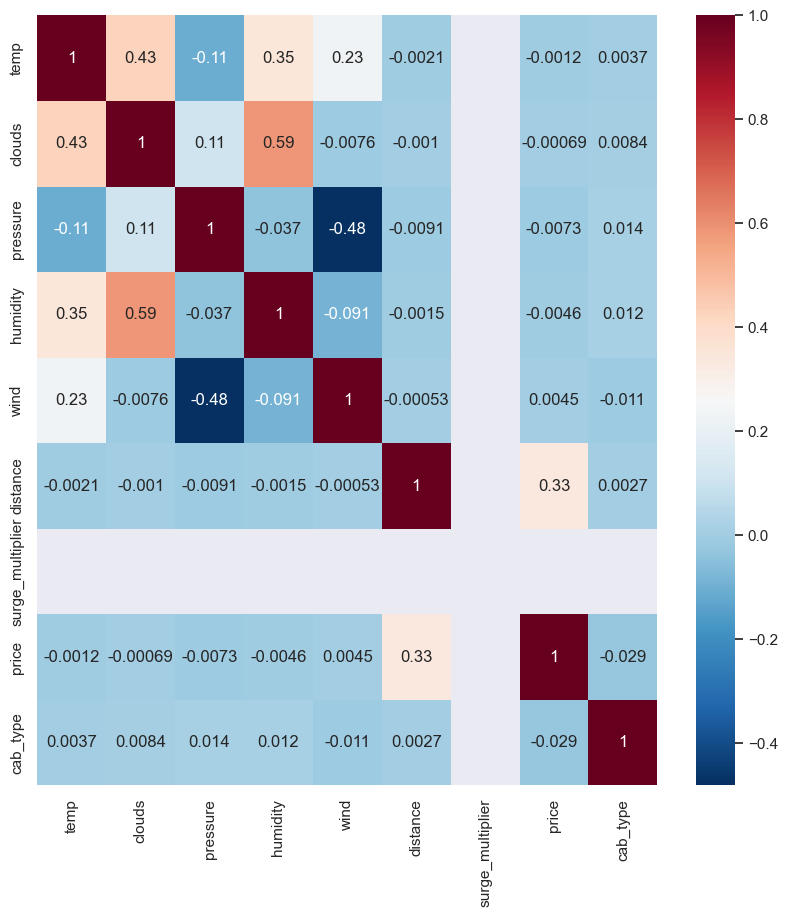

In [79]:
sns.heatmap(data.corr(),annot=True,cmap='RdBu_r')

### we will drop  `surge_multiplier` since it has no correlation with any other feature


In [82]:
data.drop(['surge_multiplier'],axis=1,inplace=True)

- we will drop `temp` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target

In [83]:
data.drop(['temp'],axis=1,inplace=True)

ans so
- we will drop `wind` and keep `pressure` ,since one of them is redundunt due to high correlation between.
- and because `pressure` has higher coorrelation with the target


In [84]:
data.drop(['wind'],axis=1,inplace=True)

ans so
- we will drop `pressure` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target


data.drop(['humidity'],axis=1,inplace=True)

ans so
- we will drop `clouds` and keep `humidity` ,since one of them is redundunt due to high correlation between.
- and because `humidity` has higher coorrelation with the target


In [85]:
data.drop(['clouds'],axis=1,inplace=True)

## we will keep source and drop location because it is redundant 

In [86]:
data.drop(['time_stamp'],axis=1,inplace=True)

In [87]:
data.shape

(141295, 9)

In [88]:
data.head()

,destination,pressure,humidity,distance,source,product_id,name,price,cab_type
0,South Station,1000.08,0.95,2.39,Beacon Hill,lyft_plus,Lyft XL,16.5,0
1,South Station,1000.08,0.95,0.55,Theatre District,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.5,1
2,South Station,1000.08,0.95,0.44,Financial District,lyft_lux,Lux Black,16.5,0
3,South Station,1000.08,0.95,2.17,North Station,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.0,1
4,South Station,1000.08,0.95,2.14,West End,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.5,1


In [89]:
d=pd.get_dummies(data=data,columns=['destination','source','name','product_id'])
data

,destination,pressure,humidity,distance,source,product_id,name,price,cab_type
0,South Station,1000.08,0.95,2.39,Beacon Hill,lyft_plus,Lyft XL,16.5,0
1,South Station,1000.08,0.95,0.55,Theatre District,6c84fd89-3f11-4782-9b50-97c468b19529,Black,15.5,1
2,South Station,1000.08,0.95,0.44,Financial District,lyft_lux,Lux Black,16.5,0
3,South Station,1000.08,0.95,2.17,North Station,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,14.0,1
4,South Station,1000.08,0.95,2.14,West End,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,8.5,1
...,...,...,...,...,...,...,...,...,...
175712,West End,994.07,0.66,0.68,Haymarket Square,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1
175713,West End,994.07,0.66,1.18,South Station,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,26.0,1
175714,West End,994.07,0.66,0.62,Haymarket Square,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,8.0,1
175717,West End,994.07,0.66,2.83,Fenway,lyft_lux,Lux Black,22.5,0


In [90]:
x=d.drop('price',axis=1)
y=d[['price']]

In [91]:
x

,pressure,humidity,distance,cab_type,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,...,product_id_6d318bcc-22a3-4af6-bddd-b409bfce1546,product_id_6f72dfc5-27f1-42e8-84db-ccc7a75f6969,product_id_997acbb5-e102-41e1-b155-9df7de0a73f2,product_id_9a0e7b09-b92b-4c41-9779-2ad22b4d779d,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier
0,1000.08,0.95,2.39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1000.08,0.95,0.55,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000.08,0.95,0.44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1000.08,0.95,2.17,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1000.08,0.95,2.14,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175712,994.07,0.66,0.68,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
175713,994.07,0.66,1.18,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
175714,994.07,0.66,0.62,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
175717,994.07,0.66,2.83,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [92]:
x.columns

Index(['pressure', 'humidity', 'distance', 'cab_type', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV',
       'product_id_55c

In [93]:
y

,price
0,16.5
1,15.5
2,16.5
3,14.0
4,8.5
...,...
175712,27.0
175713,26.0
175714,8.0
175717,22.5


In [94]:
def Scaling(data):
    return ((data-data.min())/(data.max()-data.min()))

x= Scaling(x)

In [95]:
from sklearn.model_selection import train_test_split

In [98]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [99]:
print('train:',X_train.shape)
print('test:',X_test.shape)

train: (113036, 52)
test: (28259, 52)


# Ploynomial Regression

In [108]:
from datetime import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pf = PolynomialFeatures(2)
X_poly=pf.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.25,shuffle=True,random_state=46)#46
start=datetime.now()

model_poly_reg=LinearRegression()
model_poly_reg.fit(X_train,y_train)

end=datetime.now()
print('elapsed time={}'.format(end-start))

y_pred_train= model_poly_reg.predict(X_train)
y_pred_test= model_poly_reg.predict(X_test)


print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("train error / r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("test error / Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("test error / r2_score :{}".format(r2_score(y_test,y_pred_test)))

elapsed time=0:00:12.047551
train error / Root_mean_squared_error :1.7318132620947853
train error / r2_score :0.9611452154511486
test error / Root_mean_squared_error :1.7292129130647496
test error / r2_score :0.9607006599938284


## L2 Regularization: Ridge

In [101]:
from sklearn.linear_model import RidgeCV

alphas = [0.0005, 0.005,0.001, 0.1,0.5, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas,cv=4).fit(X_train,y_train)

y_pred_train= ridgeCV.predict(X_train)
y_pred_test= ridgeCV.predict(X_test)


print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("train error / r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("test error / Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("test error / r2_score :{}".format(r2_score(y_test,y_pred_test)))

train error / Root_mean_squared_error :1.7316849343123857
train error / r2_score :0.9611509735357049
test error / Root_mean_squared_error :1.729278695847248
test error / r2_score :0.9606976698830214


# RandomForestRegressor

In [109]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators=10,max_depth=20,min_samples_split=70,min_samples_leaf=30,random_state=42)
model_random_forest.fit(X_train,y_train)

y_pred_train= model_random_forest.predict(X_train)
y_pred_test= model_random_forest.predict(X_test)

print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("train error / r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("test error / Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("test error / r2_score :{}".format(r2_score(y_test,y_pred_test)))


train error / Root_mean_squared_error :1.6286032830050847
train error / r2_score :0.9656384303188534
test error / Root_mean_squared_error :1.6843159374743644
test error / r2_score :0.9627148896276356


# XGboost


In [110]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective="reg:linear",n_estimators=50, max_depth=5,random_state=10, eta=0.1, subsample=0.7, colsample_bytree=0.7)
model_xgb.fit(X_train, y_train)

y_pred_train= model_xgb.predict(X_train)
y_pred_test= model_xgb.predict(X_test)

print("train error / Root_mean_squared_error :{}".format(mean_squared_error(y_train,y_pred_train,squared=False)))
print("train error / r2_score :{}".format(r2_score(y_train,y_pred_train)))

print("test error / Root_mean_squared_error :{}".format(mean_squared_error(y_test,y_pred_test,squared=False)))
print("test error / r2_score :{}".format(r2_score(y_test,y_pred_test)))

[02:27:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
train error / Root_mean_squared_error :1.7749193400938108
train error / r2_score :0.9591868959695999
test error / Root_mean_squared_error :1.7734455937250384
test error / r2_score :0.9586644180714649


# Save Models

In [111]:
# import pickle

# pickle.dump(model_poly_reg, open('poly_reg.pkl', 'wb'))
# pickle.dump(ridgeCV, open('ridgeCV.pkl', 'wb'))
# pickle.dump(model_random_forest, open('random_forest.pkl', 'wb'))
# pickle.dump(model_xgb, open('xgboost.pkl', 'wb'))